In [5]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict, Dict , List, Annotated , Literal
from IPython.display import Image,display 

In [31]:
# Creating state defination 
class AgentState(TypedDict):
    num1:int
    num2:int
    oper:str 
    result:int

In [19]:
def add_val(state:AgentState)->AgentState:
    print(f' Inside add value : {state}' )
    state['result'] = state['num1']+state['num2']
    print(f' after processing state : {state}')
    return state


def subtract(state:AgentState)->AgentState:
    print(f'Inside subtract : {state}')
    state['result'] = state['num1'] - state['num2']
    print(f' after processing state : {state}')
    return state

In [12]:
graph = StateGraph(AgentState)


graph.add_node('add_number',add_val)
graph.add_node('subtract',subtract)

# graph.set_entry_point('add_number')
graph.add_edge(START,'add_number')
graph.add_edge('add_number','subtract')
graph.add_edge('subtract',END)
# graph.set_finish_point('subtract')

app = graph.compile()


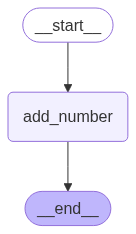

In [7]:
display(Image(app.get_graph().draw_mermaid_png()))

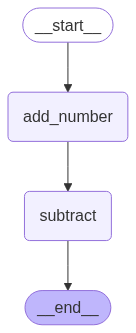

In [13]:
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
output = app.invoke({'num1':1,'num2':90 })

 Inside add value : {'num1': 1, 'num2': 90}
 after processing state : {'num1': 1, 'num2': 90, 'result': 91}
Inside subtract : {'num1': 1, 'num2': 90, 'result': 91}
 after processing state : {'num1': 1, 'num2': 90, 'result': 90}


In [18]:
output['result']

90

# Condition

In [33]:
class AgentState(TypedDict):
    num1:int
    num2:int
    oper:str 
    result:int

In [64]:
def decide_next_node(state:AgentState)-> Literal["add_number_edge","subtract_edge"]:
    print(f'Inside condition edge : {state}')
    if state['oper'] =="+":
        return "add_number_edge"
    if state['oper'] == "-":
        return "subtract_edge"


def greeting(state:AgentState)->AgentState:
    print('Hello')
    return state

In [65]:
graph = StateGraph(AgentState)

graph.add_node('add_number', add_val)
graph.add_node('subtract',subtract)
graph.add_node("router",router)



graph.add_edge(START,"router")
graph.add_conditional_edges("router",decide_next_node,
                           {
                               "add_number_edge" : "add_number",
                               "subtract_edge":"subtract"
                           })

graph.add_edge("add_number",END)
graph.add_edge("subtract",END)

app  = graph.compile()

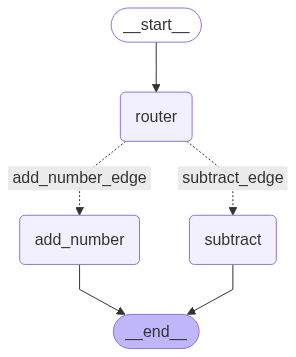

In [66]:
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
app.invoke(
    {
        "oper":"-",
        "num1":5,
        "num2":10
    }
)

Hello
Inside condition edge : {'num1': 5, 'num2': 10, 'oper': '-'}
Inside subtract : {'num1': 5, 'num2': 10}
 after processing state : {'num1': 5, 'num2': 10, 'result': -5}


{'num1': 5, 'num2': 10, 'oper': '-', 'result': -5}

# Looping 

In [87]:
import random
class AgentState(TypedDict):
    name: str
    number:List[int]
    counter:int
    

In [98]:
def greeting_node(state:AgentState)->AgentState:
    state['name'] = f"Hi theree , {state['name']}"
    state['counter'] = 0
    return state

def random_node(state:AgentState)->AgentState:
    print(f"numbers : {state['number']}")
    state['number'].append(random.randint(0,10))
    state['counter'] +=1
    return state

def should_countinue(state:AgentState)->AgentState:
    if state['counter'] <5:
        print("Entering loop",state['counter'])
        return "loop"
    else:
        return "exit"

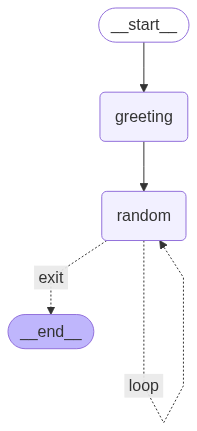

In [101]:
# greeting -> random -> random -> random -> random -> random -> END
graph = StateGraph(AgentState)

graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)
graph.add_edge("greeting","random")
graph.add_conditional_edges("random", # Source node
                            should_countinue, # Action
                            {
                                "loop" : "random", # slef-loop to same-node
                                "exit" : END # End of graph
                            }
                           )
graph.add_edge(START,"greeting")

app= graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [100]:
app.invoke(
    {"name":"nish",
     "number":[]
    }
)

numbers : []
Entering loop 1
numbers : [8]
Entering loop 2
numbers : [8, 6]
Entering loop 3
numbers : [8, 6, 6]
Entering loop 4
numbers : [8, 6, 6, 3]


{'name': 'Hi theree , nish', 'number': [8, 6, 6, 3, 10], 'counter': 5}

# AI  AGENTS

### Simple bot agent 

In [1]:
from typing import TypedDict , List
from  langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv # used for strong secret Keys 
load_dotenv()

True

In [2]:
class v                                                                                                                                                                  tate(TypedDict):
    messages:List[HumanMessage]

llm = init_chat_model(model="gpt-4o")

In [9]:
def process(state: AgentState) ->AgentState:
    response = llm.invoke(state['messages'])
    print(f"\n----- AI: {response.content}")
    return state

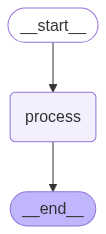

In [10]:
graph = StateGraph(AgentState)
graph.add_node("process",process)
graph.add_edge(START,"process")
graph.add_edge("process",END)
agent = graph.compile()


display(Image(agent.get_graph().draw_mermaid_png()))

In [13]:

user_input = input(" Enter: ")

while user_input != 'exit':

    output  = agent.invoke({"messages": [HumanMessage(content=user_input)]}
                )
    print("-----"*10)
    user_input = input(" Enter: ")

 Enter:  what is python 



----- AI: Python is a high-level, interpreted programming language known for its simplicity and readability. Created by Guido van Rossum and first released in 1991, Python emphasizes code readability through its use of significant whitespace. Its syntax allows programmers to express concepts in fewer lines of code compared to languages like C++ or Java. Python supports multiple programming paradigms, including procedural, object-oriented, and functional programming.

Key features of Python include:

1. **Interpreted Language:** Python code is executed line by line, which makes it easier to test and debug.

2. **Dynamic Typing:** Variable types are determined at runtime, which provides flexibility in coding.

3. **Rich Standard Library:** Python has a comprehensive standard library that supports many common programming tasks, such as file handling, internet protocols, string operations, and more.

4. **Extensive Community and Libraries:** A large community means a wealth of third-party

 Enter:  hw to learn DSA



----- AI: Learning Data Structures and Algorithms (DSA) can be a rewarding experience that greatly enhances your problem-solving skills and technical proficiency. Here’s a step-by-step guide to help you get started:

1. **Understand the Basics:**
   - Start by understanding the fundamental concepts of data structures such as arrays, linked lists, stacks, and queues.
   - Get familiar with basic algorithm concepts, including sorting (like bubble sort, merge sort) and searching algorithms (binary search).

2. **Resources & Materials:**
   - **Books:** Consider reading "Introduction to Algorithms" by Cormen et al., and "Algorithms" by Robert Sedgewick.
   - **Online Courses:** Platforms like Coursera, Udacity, edX, and Udemy offer courses on DSA. Websites like GeeksforGeeks and Khan Academy also have excellent resources.
   - **YouTube Channels:** Channels like mycodeschool, HackerRank, CodeWithHarry, and freeCodeCamp provide free tutorials.

3. **Programming Languages:**
   - Choose a p

 Enter:  exit


### ChatBOT 2.0 mem)

In [1]:
from typing import TypedDict,List, Union
from langgraph.graph import START, StateGraph , END
from langchain_core.messages import HumanMessage, AIMessage
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
class AgentState(TypedDict):
    messages : List[Union[HumanMessage,AIMessage]]
    # message_ai : List[AIMessage]

llm = init_chat_model(model="gpt-4o-mini")

In [3]:
def process(state:AgentState) -> AgentState:
    """ This node will solve the request of user"""

    response = llm .invoke(state["messages"])
    state['messages'].append(AIMessage(content=response.content))
    print(f"\n AI : {response.content}")
    # print(f"CURRENT STATE : {state['messages']}")
    
    return state


graph = StateGraph(AgentState)

graph.add_node("process",process)

graph.add_edge(START,"process")
graph.add_edge("process",END)
agent = graph.compile()


In [4]:
conversation_history = []

user_input = input(" Enter: ")
while user_input != 'exit':

    conversation_history.append(HumanMessage(content=user_input))
    output  = agent.invoke({"messages": conversation_history }
                )
    
    # print(output['messages'])
    conversation_history = output['messages']
    print("-----"*20)
    print("\n\n")
    user_input = input(" Enter: ")

 Enter:  hello myself nishant



 AI : Hello Nishant! How can I assist you today?
----------------------------------------------------------------------------------------------------





 Enter:  what is my name



 AI : Your name is Nishant. How can I help you today?
----------------------------------------------------------------------------------------------------





 Enter:  I am working on python project can suggestion how to work on it 



 AI : Of course! Here are some steps and tips to help you work on your Python project:

### 1. Define Your Project Goal
   - Clearly outline what you want your project to accomplish.
   - Write down the requirements and features.

### 2. Choose a Suitable IDE or Code Editor
   - Use an IDE like PyCharm, VSCode, or Jupyter Notebook, depending on your project type.

### 3. Set Up Your Environment
   - **Create a virtual environment** to manage dependencies:
     ```bash
     python -m venv myenv
     source myenv/bin/activate   # On Windows: myenv\Scripts\activate
     ```
   - **Install necessary packages** using pip:
     ```bash
     pip install package-name
     ```

### 4. Structure Your Project
   - Organize your code into modules and packages.
   - Follow a clear directory structure, for example:
     ```
     my_project/
     ├── src/
     │   ├── __init__.py
     │   └── main.py
     ├── tests/
     │   └── test_main.py
     ├── requirements.txt
     └── README.md
     ```

###

 Enter:  I am building  Liner regression model 



 AI : Great choice! Building a linear regression model is a fundamental task in machine learning and data analysis. Below, I've outlined the steps to create a linear regression model using Python, along with some tips and common practices.

### Steps to Build a Linear Regression Model

#### 1. **Set Up Your Environment**
Make sure you have the necessary libraries installed. You can use `pandas`, `numpy`, and `scikit-learn` for this task. If you haven't installed them yet, do so using pip:

```bash
pip install pandas numpy scikit-learn matplotlib seaborn
```

#### 2. **Import Libraries**
Start by importing the required libraries in your Python script or Jupyter Notebook:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
```

#### 3. **Load Your Dataset**
Load your data into a

 Enter:  I want it in Java



 AI : Certainly! If you're looking to implement a linear regression model in Java, you can follow a similar approach but using Java libraries. One popular library for machine learning in Java is **Weka**, but you can also use **Apache Commons Math** for statistical functionality or create your own implementation from scratch.

Below are the steps to build a basic linear regression model in Java.

### Steps to Implement Linear Regression in Java

#### 1. **Set Up Your Java Environment**
Make sure you have Java installed, as well as an IDE like IntelliJ IDEA, Eclipse, or NetBeans. If you're using Maven, you can easily include dependencies in your `pom.xml`.

### Dependency Management with Maven (Optional)
If you wish to use Weka, you can add the following dependency to your `pom.xml`:

```xml
<dependency>
    <groupId>nz.ac.waikato.cms.weka</groupId>
    <artifactId>weka-stable</artifactId>
    <version>3.8.5</version>
</dependency>
```

#### 2. **Import Necessary Libraries**
If you're 

 Enter:  exit


# REACT AGENT 

In [11]:
from typing import TypedDict , List , Annotated , Sequence
from langgraph.graph import StateGraph , END , START
from langchain_core.messages import BaseMessage
from langchain_core.messages import AIMessage , HumanMessage , ToolMessage , SystemMessage
from langchain_core.tools import tool 
from langgraph.graph.message import add_messages # reducer function 
from langgraph.prebuilt import ToolNode
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
load_dotenv()

True

In [39]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

@tool
def add(num1:int , num2:int):
    """ This is an addition function that adds 2 number together
    Args:
        num1 : first number
        num2 : second number

    return
        result : sum of two number
    """
    return num1+num2

tools = [add]

llm_tools = init_chat_model(model="gpt-4o-mini").bind_tools(tools)

In [41]:
add.invoke({"num1":1,"num2":2})

3

In [28]:
def model_call(state:AgentState)->AgentState:
    system_prompt = SystemMessage(content="You are an AI expert, please answer query to the best of your ability.")
    response = llm_tools.invoke(state['messages'])
    return {"messages":[response]}

In [42]:
print(add.name) # multiply
print(add.description) # Multiply two numbers.
print(add.args) 
# {
# 'type': 'object', 
# 'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 
# 'required': ['a', 'b']
# }

add
This is an addition function that adds 2 number together
Args:
    num1 : first number
    num2 : second number

return
    result : sum of two number
{'num1': {'title': 'Num1', 'type': 'integer'}, 'num2': {'title': 'Num2', 'type': 'integer'}}


In [46]:
add.